# Importar dataset

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
path_data = "./datasets/"
file_data = "diabetes2.csv"
full_path = os.path.join(path_data, file_data)
df = pd.read_csv(full_path, sep = ",")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Regresion logistica

La Regresión Logística Simple, desarrollada por David Cox en 1958, es un método de regresión que permite estimar la probabilidad de una variable cualitativa binaria en función de una variable cuantitativa. Una de las principales aplicaciones de la regresión logística es la de **clasificación binaria**, en el que las observaciones se clasifican en un grupo u otro dependiendo del valor que tome la variable empleada como predictor. Por ejemplo, clasificar a un individuo desconocido como hombre o mujer en función del tamaño de la mandíbula.

La Regresion Logistica se ayuda de una funcion sigmoide el cual utiliza la generalizacion de la regresion lineal para realiza una clasisificacion, asi:

<img src="./images/FS.png" height = "300" width = "300">

Ademas esta seria la funcion de coste a minimizar:
<br>
<img src="./images/FC.png" height = "350" width = "350">
<br>
Generalizacion de la regresion lineal multiple:
<br>
<br>
<img src="./images/linear_r.png" height = "230" width = "230">
<br>
<br>
Graficamente y reemplazando la generalizacion de la regresion lineal multiple en la funcion sigmoide:
<br>
<img src="./images/reg_log.png" height = "600" width = "600">

<img src="./images/reg_log2.jpg" height = "600" width = "600">

## Gradiente Descendiente

Todos los modelos de ML buscan minimizar una funcion de costo, una de las formas de hacerlo es mediante el gradiente descendiente, el cual utiliza las derivadas parciales para minimiza de forma correcta la funcion y que esta no caiga en un minimo local, y asi se pueda llegar a un minimo global

- link de explicacion del GD: https://www.youtube.com/watch?v=A6FiCDoz8_4&t=242s

## Train Model

In [38]:
df_diabetes = df.copy()
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
X = df_diabetes.drop(["Outcome"], axis = 1).values
y = df_diabetes[["Outcome"]].values

display(X)
display(y)

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = 0.8, 
                                                    random_state = 45)

In [32]:
print(f"Data X_train size: {X_train.shape}")
print(f"Data y_train size: {y_train.shape}")
print(f"Data X_test size:  {X_test.shape}")
print(f"Data y_test size:  {y_test.shape}")

Data X_train size: (614, 8)
Data y_train size: (614, 1)
Data X_test size:  (154, 8)
Data y_test size:  (154, 1)


In [42]:
LR = LogisticRegression(random_state = 45, 
                        max_iter = 500, 
                        solver = "lbfgs",
                        class_weight = True)

LR_model = LR.fit(X_train, y_train)

C:\Users\usuario1\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
y_pred = LR_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7337662337662337

In [44]:
y_pred_train = LR_model.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.7866449511400652

## Matriz de confusion

Una de las formas de entender cuan bueno es nuestro modelo es realizando una matriz de confusion: 
    
<img src="./images/cm.png" height = "350" width = "350">  

Donde:

- **TP**: True positives (Verdaderos positivos)
- **FP**: False positives (Falsos positivos)
- **TN**: True negatives (Verdaderos negativos)
- **FN**: False negatives (Falsos negativos)

In [46]:
y_pred = LR_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[87, 17],
       [24, 26]], dtype=int64)

In [50]:
def confusion_matrix_heatmap(y_test, y_pred):
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, fmt = ".0f", cmap = "Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Real Values")
    plt.ylabel("PRedict Values");

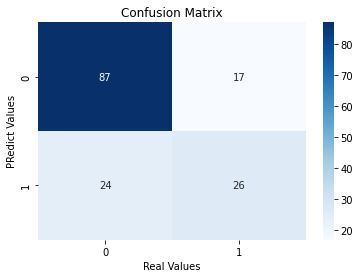

In [53]:
confusion_matrix_heatmap(y_test, y_pred)

# Overfitting y Underfitting

<img src="./images/over.png" height = "500" width = "500">  

**Overfitting**: el “sobreajuste”, se produce cuando nuestro modelo se aprende los datos de train perfectamente, por lo que no es capaz de generalizar, y cuando le lleguen nuevos datos obtendrá pésimos resultados

- Dividir nuestros datos en training, validación y testing.
- Obtener un mayor número de datos.
- Ajustar los parámetros de nuestros modelos.
- Utilizar modelos más simples.
- Los datos vienen de distintas distribuciones.
- Bajar el número de iteraciones en los algoritmos iterativos.

**Underfitting**: el “infrajuste”, se produce cuando nuestro modelo no es capaz de identificar patrones. Por lo que tendrá siempre pésimos resultados. Formas de prevenir el underfitting:

- Tratar los datos correctamente, eliminando outliers y variables innecesarias.
- Utilizar modelos más complejos.
- Ajustar los parámetros de nuestros modelos.
- Aumentar las iteraciones en los algoritmos iterativos

# Cross validation

El método K-Fold Cross-Validation es también un proceso iterativo. Consiste en dividir los datos de forma aleatoria en k grupos de aproximadamente el mismo tamaño, k-1 grupos se emplean para entrenar el modelo y uno de los grupos se emplea como validación. Este proceso se repite k veces utilizando un grupo distinto como validación en cada iteración. El proceso genera k estimaciones del error cuyo promedio se emplea como estimación final.

<img src="./images/kfold.png" height = "650" width = "650">  

In [55]:
LR = LogisticRegression(random_state = 45, 
                        max_iter = 500, 
                        solver = "lbfgs",
                        class_weight = True)

In [59]:
scores = cross_val_score(LR, 
                         X, 
                         y, 
                         scoring = "accuracy", 
                         cv = 5)

print(scores)

[0.77272727 0.74675325 0.75324675 0.81045752 0.77777778]


# Hyperparameter tuning

Los hiperparámetros son parámetros ajustables que permiten controlar el proceso de entrenamiento de un modelo. Por ejemplo, con redes neuronales.

El ajuste de hiperparámetros, también denominado optimización de hiperparámetros es el proceso de encontrar la configuración de hiperparámetros que produzca el mejor rendimiento. Normalmente, el proceso es manual y costoso desde el punto de vista computacional.
<br>
<br>
<img src="./images/hyper.png" height = "500" width = "500">  
<br>
<br>

In [68]:
LR = LogisticRegression(random_state = 42)

# Paramateros
params = {
    "class_weight": [None, "balanced"],
    "solver": ["liblinear", "lbfgs"],
    "max_iter": [300, 500, 1000, 1200],
    "C": [0.01, 0.05, 0.1, 0.5, 1],
    "penalty": [None, "l1", "l2", "elasticnet"],
}

# Hypertuning
grid_search = GridSearchCV(estimator = LR,
                           param_grid = params,
                           return_train_score = True,
                           scoring = "accuracy", 
                           cv = 15)

grid_search.fit(X_train, y_train)

# Best model
print(f"Best Score: {grid_search.best_score_}")
print(f"Best Model: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)

Best Score: 0.7784552845528456
Best Model: LogisticRegression(C=0.5, max_iter=300, random_state=42)


0.7337662337662337

# Support Vector Machine

El método de clasificación-regresión Máquinas de Vector Soporte (Vector Support Machines, SVMs) fue desarrollado en la década de los 90, dentro de campo de la ciencia computacional. Si bien originariamente se desarrolló como un método de clasificación binaria, su aplicación se ha extendido a problemas de clasificación múltiple y regresión. SVMs ha resultado ser uno de los mejores clasificadores para un amplio abanico de situaciones, por lo que se considera uno de los referentes dentro del ámbito de aprendizaje estadístico y machine learning.

## Concepto de Hiperplano

Un hiperplano se define como un subespacio que divide un plano en dos, es decir, que en un plano R2 un hiperplano es una recta que divide el plano en dos partes, mientras que en un espacio tridimensional quien divide el espacio es un plano convencional.

- Cabe resaltar que quien divide un plano bidimensional en dos es una recta lineal que corresponde a la siguiente ecuacion: 
<br>
<br>
$$ \beta_0 + \beta_1x_1 = 0 $$
<br>
- Esto se puede generalizar para p-dimensiones de la siguiente forma:
<br>
<br>
$$ \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p = 0 $$
<br>
<br>
Hiperplano de separacion bidimensional y tridimensional:
<br>
<br>
<img src="./images/hiperplanos.png" height = "600" width = "600">  
<br>
<br>

## Maximal Margin

El maximal margin se define como el hiperplano que consigue un mayor margen, es decir, que la distancia mínima entre el hiperplano y las observaciones es lo más grande posible
<br>
<br>
<img src="./images/margin.jpg" height = "350" width = "350">  

La imagen anterior muestra el maximal margin hyperplane para un conjunto de datos de entrenamiento. Las tres observaciones equidistantes respecto al maximal margin hyperplane se encuentran a lo largo de las líneas discontinuas que indican la anchura del margen. A estas observaciones se les conoce como vectores soporte, ya que son vectores en un espacio p-dimensional y soportan (definen) el maximal margin hyperplane. Cualquier modificación en estas observaciones (vectores soporte) conlleva cambios en el maximal margin hyperplane

- link documentacion: https://scikit-learn.org/stable/modules/svm.html

## Support Vector Classifiers

El Maximal Margin Classifier descrito en la sección anterior tiene poca aplicación práctica, ya que rara vez se encuentran casos en los que las clases sean perfecta y linealmente separables. De hecho, incluso cumpliéndose estas condiciones ideales, en las que exista un hiperplano capaz de separar perfectamente las observaciones en dos clases, esta aproximación sigue presentando dos inconvenientes:

- Dado que el hiperplano tiene que separar perfectamente las observaciones, es muy sensible a variaciones en los datos. Incluir una nueva observación puede suponer cambios muy grandes en el hiperplano de separación (poca robustez).

- Que el maximal margin hyperplane se ajuste perfectamente a las observaciones de entrenamiento para separarlas todas correctamente suele conllevar problemas de overfitting.

Por estas razones, es preferible crear un clasificador basado en un hiperplano que, aunque no separe perfectamente las dos clases, sea más robusto y tenga mayor capacidad predictiva al aplicarlo a nuevas observaciones (menos problemas de overfitting). Esto es exactamente lo que consiguen los clasificadores de vector soporte, también conocidos como soft margin classifiers o Support Vector Classifiers. Para lograrlo, en lugar de buscar el margen de clasificación más ancho posible que consigue que las observaciones estén en el lado correcto del margen; se permite que ciertas observaciones estén en el lado incorrecto del margen o incluso del hiperplano.

<br>
<br>
<img src="./images/descarga.png" height = "350" width = "350">  

In [4]:
path_data = "./datasets/"
file_data = "diabetes2.csv"
full_path = os.path.join(path_data, file_data)
df_diabetes = pd.read_csv(full_path, sep = ",")
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = df_diabetes.drop(["Outcome"], axis = 1).values
y = df_diabetes[["Outcome"]].values

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = 0.8, 
                                                    random_state = 45)

In [7]:
svc = SVC(kernel = "linear", random_state = 45, max_iter = 10000)
model_svc = svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)

In [8]:
print("-------- Metrics ---------")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

-------- Metrics ---------
Accuracy: 0.6103896103896104


In [ ]:
from sklearn.model_selection import GridSearchCV

In [13]:
params = {
    "kernel": ["linear", "rbf", "poly"],
    "degree": [3, 4, 5, 6],
    "max_iter": [1000, 3000, 5000, 10000],
    "class_weight": [None, "balanced"],
    "random_state": [45]
}

svc = SVC()

gridsearch = GridSearchCV(estimator = svc,
                          param_grid = params,
                          return_train_score = True, 
                          scoring = "accuracy", 
                          cv = 15)

gridsearch.fit(X_train, y_train)

# Best model
print(f"Best Score: {gridsearch.best_score_}")
print(f"Best Model: {gridsearch.best_estimator_}")

best_model = gridsearch.best_estimator_
y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)

Best Score: 0.773617886178862
Best Model: SVC(kernel='poly', max_iter=10000, random_state=45)


0.7402597402597403

# K-Nearest Neighbor

El algoritmo de k-NN es, sin lugar a dudas, el algoritmo más simple de ML. El modelo consiste solo en el almacenamiento en memoria de los datos de entrenamiento. Mediante este algoritmo, la clase de una instacia se predice al buscar dentro de los datos los vecinos más cercanos a la instacia.

**Clasificación en K-NN**

La forma más sencilla de K-NN consiste en la busqueda del vecino más cercano a una instancia nueva, cuya clase queremos predecir. La predicción corresponderá entonces a la clase del dato de entrenamiento más cercano a la nueva instancia. En la siguiente figura se ilustra este caso de clasificación en unos datos de entrenamiento genérico. Las instancias nuevas, se representan mediate estrellas y color representa la clase, deducida del vecino más cercano. Cada instancia nueva se asocia con el vecino más cercano mediante una linea que los conecta. 

- **Nota**: Este algoritmo tiene como desventaja un gran costo computacional

## Calcular el vecino mas cercano
<img src="./images/knn1.jpg" height = "350" width = "350" align="left">  
<img src="./images/knn2.jpg" height = "350" width = "350">  

### Distancia euclideana
<img src="./images/knn3.jpg" height = "380" width = "380">
<img src="./images/knn4.jpg" height = "300" width = "300">  


In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors = 30)
model_knn = knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

In [26]:
print("-------- Metrics ---------")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

-------- Metrics ---------
Accuracy: 0.7272727272727273


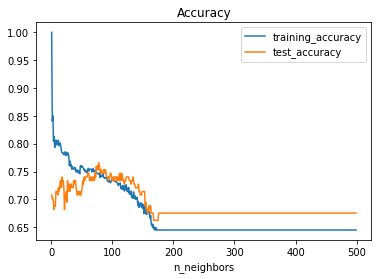

In [23]:
training_accuracy = []
test_accuracy = []

n_neighbors_range = range(1, 500)
for neighbors in n_neighbors_range:
    
    knn = KNeighborsClassifier(n_neighbors = neighbors)
    model_knn = knn.fit(X_train, y_train)
    y_pred_train_knn = model_knn.predict(X_train)
    y_pred_test_knn = model_knn.predict(X_test)
    
    training_accuracy.append(accuracy_score(y_train, y_pred_train_knn))
    test_accuracy.append(accuracy_score(y_test, y_pred_test_knn))

plt.plot(n_neighbors_range, training_accuracy, label = "training_accuracy")
plt.plot(n_neighbors_range, test_accuracy, label = "test_accuracy")
plt.title("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

# Decision Tree Classifier

Un árbol de decisión es una estructura de árbol similar a un diagrama de flujo donde un nodo interno representa una característica (o atributo), la rama representa una regla de decisión y cada nodo hoja representa el resultado. El nodo superior de un árbol de decisión se conoce como nodo raíz. Aprende a particionar sobre la base del valor del atributo. Particiona el árbol de manera recursiva llamada partición recursiva. Esta estructura similar a un diagrama de flujo le ayuda en la toma de decisiones. Es la visualización como un diagrama de flujo que imita fácilmente el pensamiento a nivel humano. Es por eso que los árboles de decisión son fáciles de entender e interpretar

<img src="./images/dt.jpg" height = "500" width = "500">  

# Guardar modelo pkl

In [32]:
import joblib
import numpy as np

In [27]:
knn = KNeighborsClassifier(n_neighbors = 30)
model_knn = knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

In [28]:
joblib.dump(model_knn, "model_knn.pkl")

['model_knn.pkl']

In [33]:
##### importar modelo

file_name = "./modelos/model_knn.pkl"
model_knn = joblib.load(file_name)

x = np.array([[5.00e+00, 1.58e+02, 8.40e+01, 4.10e+01, 2.10e+02, 3.94e+01,3.95e-01, 2.90e+01]])
model_knn.predict(x)

array([1], dtype=int64)